# Mathematical background

Like the Python review, this doesn't cover all the math that could be relevant, just the important concepts for data analysis and machine learning.

I will _not_ be assuming that these concepts are familiar to you. **Ask questions!**

I also don't expect you to learn new mathematical topics quickly enough to pass a quiz or something: the goal here is for you to have _the right picture in mind_ while the computer performs the computations.

With the right picture in mind, you will be able to understand why we call the functions that we do, and what the outputs and plots mean.

Also, if you're learning any of these topics in school, you'll see what they lead to.

<br><br><br>

## N-dimensional space

At the end of the last notebook, we plotted the penguins like this:

<img src="img/02-side-by-side-plots.svg" width="1000">

344 flesh-and-blood penguins have been reduced to dots on paper (er, on a screen).

<br><br><br>

In general, this is how we approach all data analysis problems:

1. measure real-world quantities,
2. think of them as points in an N-dimensional space*,
3. a good statistical description or theoretical prediction should match the _points in space_ as closely as possible.

<br><br><br>

\* N-dimensional space: more than just 3-D

Physical space might have only 3 dimensions, but data can have any number of dimensions: any "N".

The following NumPy arrays cover 1-D, 2-D, 3-D, and 4-D grids with random numbers:

In [1]:
import numpy as np

In [21]:
one_dimensional_array = np.random.normal(0, 1, size=(5,))
one_dimensional_array

array([ 1.4643831 , -1.50488229, -0.29471664, -1.91777508,  0.66501619])

In [43]:
two_dimensional_array = np.random.normal(0, 1, size=(5, 5))
two_dimensional_array

array([[ 1.39881076, -0.49697495,  2.06060315,  0.80975646, -0.66816283],
       [-1.73230123, -0.7699906 ,  0.43020985,  0.57085584, -1.83111043],
       [ 0.73296273,  1.60347134,  0.30566382, -1.53297666, -1.00635776],
       [ 0.31213396, -0.60736985,  0.26879576,  1.70680467,  0.39186452],
       [ 0.37077492,  0.4195445 , -0.04371036,  1.25951505, -0.1472152 ]])

In [23]:
three_dimensional_array = np.random.normal(0, 1, size=(3, 5, 3))
three_dimensional_array

array([[[ 0.0053581 , -1.64641964, -2.02080446],
        [ 0.15463416, -0.97220174,  1.46647923],
        [ 0.49409027, -0.23123421, -0.93017238],
        [-0.88790594, -0.50343305, -2.32356288],
        [-1.06951624,  0.04039258, -0.59533068]],

       [[ 0.1357024 , -2.76423883, -0.20127904],
        [ 1.06858342, -0.62963262, -0.5017381 ],
        [-0.22417802, -0.83512748, -0.25149674],
        [ 1.21809634, -0.04156787, -0.10968404],
        [ 0.80174393, -1.63161191,  0.32772019]],

       [[ 0.31513944,  0.08507208,  0.66974703],
        [-0.78327762,  1.19233711, -1.48717917],
        [ 0.59719843,  0.54381092, -0.96039838],
        [-1.47052445,  1.01028848,  0.53484527],
        [-0.90110632, -0.84038073, -0.49668328]]])

In [24]:
four_dimensional_array = np.random.normal(0, 1, size=(2, 3, 5, 3))
four_dimensional_array

array([[[[-0.65674229, -0.04719387,  1.91292376],
         [ 1.22423791,  0.33982509,  0.094373  ],
         [-0.42978727, -1.40687841,  0.22728876],
         [ 0.56137906, -2.30750104, -0.36280432],
         [ 0.5625392 , -0.53175734, -0.40650354]],

        [[ 1.72629264,  0.57254656,  1.21918654],
         [ 0.73631821,  2.47637685,  0.01222482],
         [ 0.22608847,  1.86529571,  0.87998432],
         [ 0.60456022,  0.75098559, -0.21880367],
         [-0.32197859,  1.5195817 ,  0.16741503]],

        [[-1.74904114, -1.31523056, -1.71202808],
         [ 0.04064047,  0.82171708, -2.32178292],
         [ 2.19373186, -0.8498254 ,  0.48110813],
         [-1.43194697, -0.47886943,  1.06408234],
         [ 0.09988733,  0.86649723, -1.75061721]]],


       [[[ 1.59637967, -0.25233638,  0.89131527],
         [-1.3677012 , -0.02891474,  1.2695753 ],
         [ 1.22427088, -0.39280314,  0.55127103],
         [ 1.03569001, -0.9051632 , -1.51710004],
         [-0.71708731,  1.00968967, -0.005

<br><br><br>

We can visualize 2 dimensions as an image, presenting position along the grid spatially (the $x$ and $y$ axes) and the numbers as colors (dark blue to yellow in the default).

In [25]:
import matplotlib.pyplot as plt

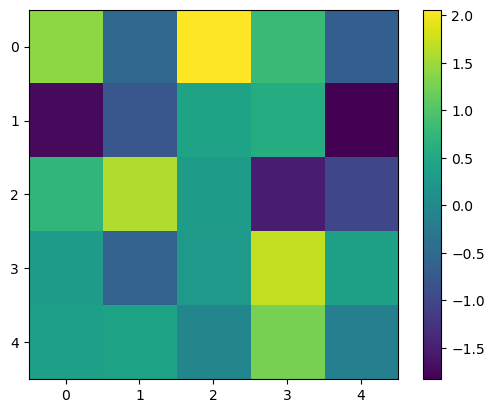

In [44]:
plt.imshow(two_dimensional_array)
plt.colorbar()

Or we could show the same thing as contour lines. (Note that the $y$ axis is flipped vertically between these two visualizations.)

<a list of 18 text.Text objects>

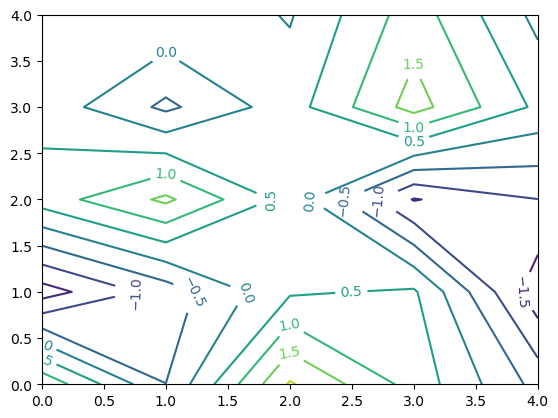

In [45]:
contour = plt.contour(two_dimensional_array)
plt.clabel(contour)

If we have more dimensions, we have to slice out a region of interest or sum/average over them to get something 2-D that we can visualize.

With one dimension, we can make the numbers $y$ positions of an $x$-$y$ plot, rather than colors:

Text(0, 0.5, 'numbers in the array')

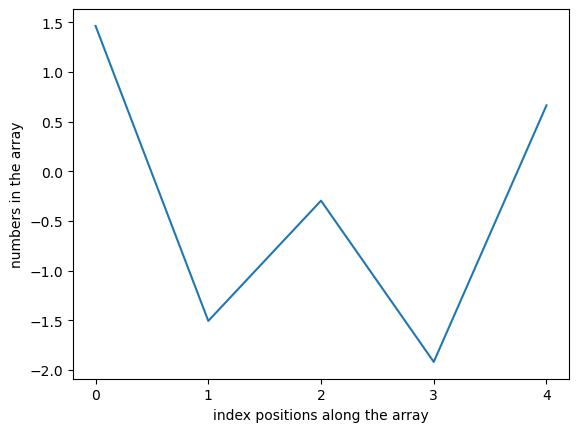

In [80]:
index_positions = np.arange(len(one_dimensional_array))

plt.plot(index_positions, one_dimensional_array)

plt.xticks(index_positions)
plt.xlabel("index positions along the array")
plt.ylabel("numbers in the array")

<br><br><br>

A 2-D example with not-so-random numbers:

In [90]:
x, y = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))

three_spots = (
    1/(1 +  x**2      +  y**2     ) +     # first alien spaceship
    1/(1 + (x - 2)**2 + (y - 2)**2) +     # second alien spaceship
    1/(1 + (x + 3)**2 + (y - 3)**2)       # third alien spaceship
)

three_spots

array([[0.04420161, 0.04482222, 0.04544896, ..., 0.04564063, 0.04497169,
        0.04430893],
       [0.04508438, 0.04572927, 0.0463809 , ..., 0.04659843, 0.04590175,
        0.04521192],
       [0.04598885, 0.04665901, 0.04733658, ..., 0.04758163, 0.04685593,
        0.0461378 ],
       ...,
       [0.15915841, 0.16611608, 0.17337632, ..., 0.09666626, 0.09386209,
        0.09114467],
       [0.15331784, 0.15972007, 0.16637358, ..., 0.09414021, 0.09148704,
        0.0889115 ],
       [0.14766811, 0.15355806, 0.15965558, ..., 0.09168456, 0.08917366,
        0.08673218]])

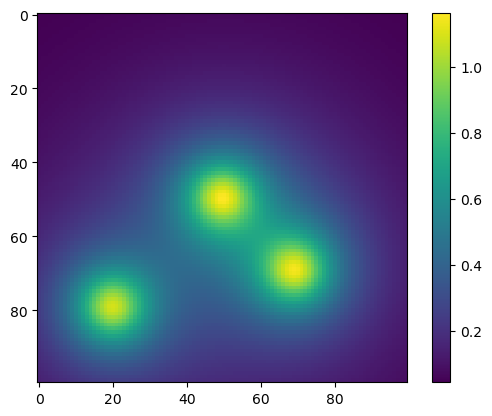

In [91]:
plt.imshow(three_spots)
plt.colorbar()

<a list of 12 text.Text objects>

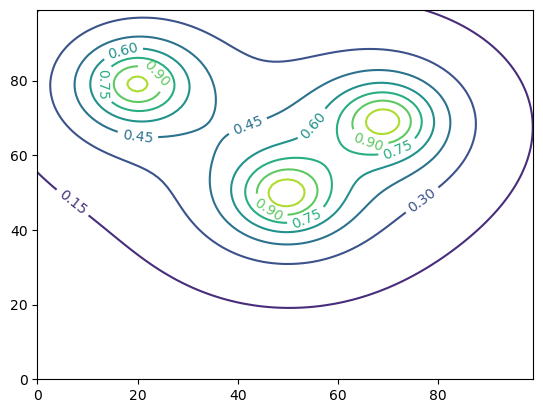

In [88]:
contour = plt.contour(three_spots)
plt.clabel(contour)

<br><br><br>

Slicing through the middle and plotting in 1-D:

In [81]:
one_dimensional_slice = three_spots[50, :]

Text(0, 0.5, 'numbers in the array')

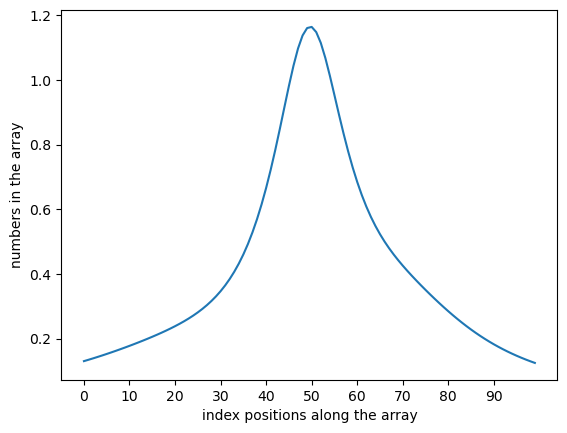

In [83]:
plt.plot(np.arange(len(one_dimensional_slice)), one_dimensional_slice)

plt.xticks(np.arange(0, len(one_dimensional_slice), 10))
plt.xlabel("index positions along the array")
plt.ylabel("numbers in the array")

<br><br><br>

Summing over the $y$ dimension and plotting in 1-D:

In [84]:
one_dimensional_projection = np.sum(three_spots, axis=0)

Text(0, 0.5, 'numbers in the array')

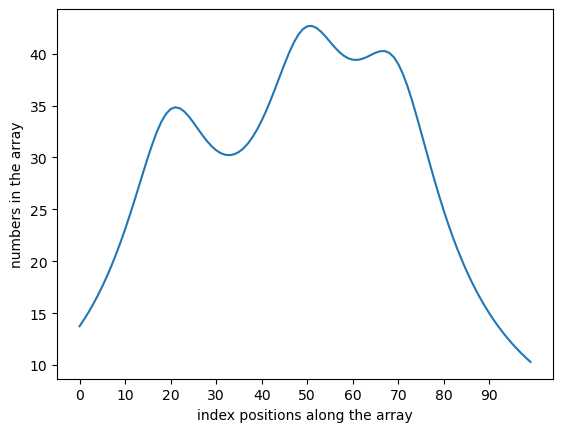

In [85]:
plt.plot(np.arange(len(one_dimensional_projection)), one_dimensional_projection)

plt.xticks(np.arange(0, len(one_dimensional_projection), 10))
plt.xlabel("index positions along the array")
plt.ylabel("numbers in the array")

<br><br><br>

Similarly, when we slice or project 3-D, 4-D, ... N-D arrays to visualize them in 1-D or 2-D, we're either cutting out parts or "squashing" parts together, or both.

<br><br><br>

## Measurements as N-dimensional points

In an array like

In [93]:
four_dimensional_array

array([[[[-0.65674229, -0.04719387,  1.91292376],
         [ 1.22423791,  0.33982509,  0.094373  ],
         [-0.42978727, -1.40687841,  0.22728876],
         [ 0.56137906, -2.30750104, -0.36280432],
         [ 0.5625392 , -0.53175734, -0.40650354]],

        [[ 1.72629264,  0.57254656,  1.21918654],
         [ 0.73631821,  2.47637685,  0.01222482],
         [ 0.22608847,  1.86529571,  0.87998432],
         [ 0.60456022,  0.75098559, -0.21880367],
         [-0.32197859,  1.5195817 ,  0.16741503]],

        [[-1.74904114, -1.31523056, -1.71202808],
         [ 0.04064047,  0.82171708, -2.32178292],
         [ 2.19373186, -0.8498254 ,  0.48110813],
         [-1.43194697, -0.47886943,  1.06408234],
         [ 0.09988733,  0.86649723, -1.75061721]]],


       [[[ 1.59637967, -0.25233638,  0.89131527],
         [-1.3677012 , -0.02891474,  1.2695753 ],
         [ 1.22427088, -0.39280314,  0.55127103],
         [ 1.03569001, -0.9051632 , -1.51710004],
         [-0.71708731,  1.00968967, -0.005

every grid position in the 4-D space is filled with a number.

The penguin data is also 4 dimensional, but it's different:

In [94]:
import pandas as pd

In [96]:
penguins = pd.read_csv("data/penguins.csv")
penguins[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]]

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0
...,...,...,...,...
339,55.8,19.8,207.0,4000.0
340,43.5,18.1,202.0,3400.0
341,49.6,18.2,193.0,3775.0
342,50.8,19.0,210.0,4100.0


The 4 dimensions of "bill length", "bill depth", "flipper length", and "body mass" are presented in a 2 dimensional table.

Also, we plot them as points, not as space-filling colors or curves.

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

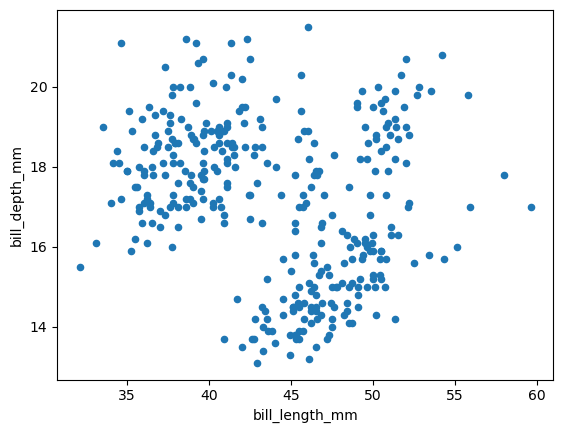

In [97]:
penguins.plot.scatter("bill_length_mm", "bill_depth_mm")

<br><br><br>

The data can be presented as a NumPy array,

In [100]:
penguins[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]].values

array([[  39.1,   18.7,  181. , 3750. ],
       [  39.5,   17.4,  186. , 3800. ],
       [  40.3,   18. ,  195. , 3250. ],
       ...,
       [  49.6,   18.2,  193. , 3775. ],
       [  50.8,   19. ,  210. , 4100. ],
       [  50.2,   18.7,  198. , 3775. ]])

but it has a different interpretation: instead of interpreting the index position along the array as $x$ or $y$, we're now interpreting

* a number in the first column as the position in the first dimension,
* a number in the second column as the position in the second dimension,
* a number in the third column as the position in the third dimension,
* a number in the fourth column as the position in the fourth dimension.

A data frame represents as many dimensions as it has _columns_.

In [101]:
penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

<br><br><br>

## Data and models